In [1]:
import importlib

import numpy as np
import matplotlib.pyplot as plt

import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

In [2]:
model_BS = BlackScholes(sigma=0.2, r=0.1)

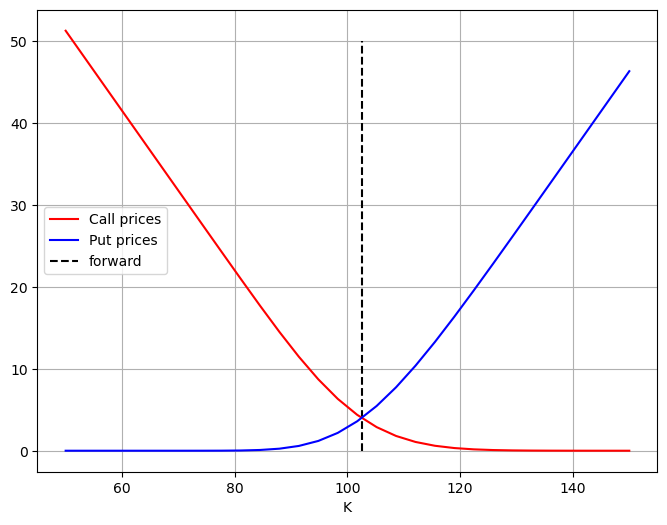

In [3]:
K = np.linspace(50, 150, 30)
S0 = 100
T = 0.25

call_prices = model_BS.vanilla_price(T=T, K=K, S=S0, flag='c')
put_prices = model_BS.vanilla_price(T=T, K=K, S=S0, flag='p')
forward = S0 * np.exp(model_BS.r * T)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(K, call_prices, "r", label='Call prices')
ax.plot(K, put_prices, "b", label='Put prices')
ax.vlines(forward, 0, 50, 'k', ls='--', label='forward')
ax.grid()
ax.set_xlabel("K")
ax.legend()


## BS Calculator

In [5]:
S0=91.630000
T=0.559000
K=94.19000
r=0.063000
q=0.000000
sigma=0.264400
flag = 'c'

model = BlackScholes(sigma=sigma, r=r)
model.vanilla_price(T, K, S0, flag)

7.542063802537719

## Binomial model

In [6]:
from Binomial import Binomial

In [7]:
K = 10.4
S0 = 10
u = 4/100
d = 1/100
r = 2/100
T = 3

In [8]:
model = Binomial(u=u, d=d, r=r)
model.vanilla_price(T, K, S0, 'c')

0.22692797055598696

## 3d Black-Scholes

In [10]:
import importlib
import numpy as np
import BlackScholes
importlib.reload(BlackScholes)
from BlackScholes import BlackScholes

In [11]:
rng = np.random.default_rng()

In [12]:
rho = 0.90
r = 0.05
cov_mat = np.ones((3, 3)) * rho + (1 - rho) * np.eye(3)

model = BlackScholes(sigma=cov_mat, r=r)

In [13]:
s0 = np.ones(3) * 100
t_grid = np.linspace(0, 1, 10000)

trajs = model.simulate_trajectory(
    n_sample=20,
    t_grid=t_grid,
    init_val=s0,
    random_state=rng
)

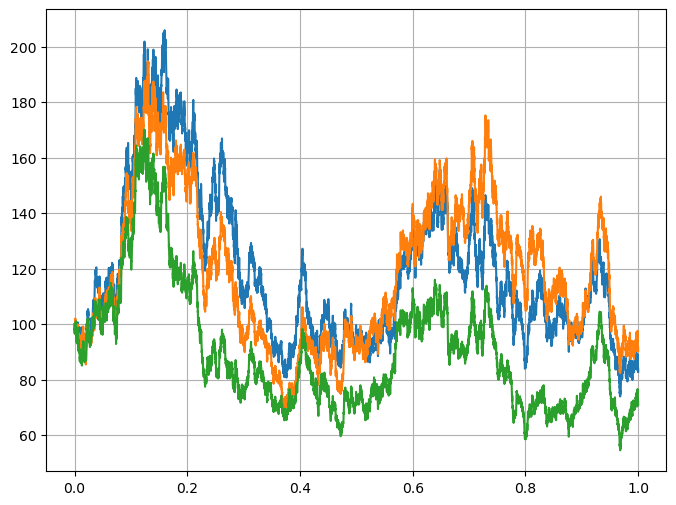

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

idx_traj = 0

ax.plot(t_grid, trajs[idx_traj, 0])
ax.plot(t_grid, trajs[idx_traj, 1])
ax.plot(t_grid, trajs[idx_traj, 2])
ax.grid()

### Estimation of the covariance matrix

In [15]:
dt = t_grid[1] - t_grid[0]
np.cov(np.diff(np.log(trajs) / np.sqrt(dt), axis=-1)[0]), cov_mat

(array([[1.00168933, 0.90194587, 0.90685342],
        [0.90194587, 1.00013813, 0.90527832],
        [0.90685342, 0.90527832, 1.01130929]]),
 array([[1. , 0.9, 0.9],
        [0.9, 1. , 0.9],
        [0.9, 0.9, 1. ]]))

## Implied volatility

In [20]:
import ImpliedVol
importlib.reload(ImpliedVol)
from ImpliedVol import black_scholes_iv, black_iv

from Black76 import Black76

In [21]:
r = 0.05
sigma = 0.25
S = 100
K = np.linspace(80, 120, 40)[None, :]
T = np.array([0.5, 1, 1.5, 2])[:, None]

F = S * np.exp(r * T)

model_BS = BlackScholes(sigma=sigma, r=r)
model_Black = Black76(sigma=sigma, r=r)

call_prices_BS = model_BS.vanilla_price(T, K, S, 'c')
call_prices_Black = model_Black.vanilla_price(T, K, S * np.exp(r * T), 'c')

max(
    np.max(np.abs(black_scholes_iv(call_prices_BS, T, K, S, r, 'c', method='Newton') - sigma)), 
    np.max(np.abs(black_iv(call_prices_Black, T, K, F, r, 'c', method='Newton') - sigma))
)

9.498649089501043e-10

In [22]:
np.max(np.abs(model_Black.vega(T, K, F) - model_BS.vega(T, K, S)))

2.842170943040401e-14

## Monte Carlo test

In [23]:
S0 = 91.630000
T = 0.559000
K = 94.19000
r = 0.063000
q = 0.000000
sigma = 0.264400
flag = 'c'

model = BlackScholes(sigma=sigma, r=r)
model.vanilla_price(T, K, S0, flag)

7.542063802537719

In [31]:
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S0)

np.exp(-r * T) * np.maximum(trajs - K, 0).mean()

7.553430633345825

In [32]:
S0 = 91.630000
T = 0.559000
K = 94.19000
r = 0.063000
q = 0.000000
sigma = 0.264400
flag = 'c'

model = Black76(sigma=sigma, r=r)
model.vanilla_price(T, K, S0 * np.exp(r * T), flag)

7.542063802537723

In [35]:
n_sample = 10**7
t_grid = np.array([T])
trajs = model.simulate_trajectory(n_sample, t_grid, S0*np.exp(r*T))

np.exp(-r * T) * np.maximum(trajs - K, 0).mean()

7.542804454057484